 Fs=1000 hz
 Ts=0.001 s


(0.0, 500.0)

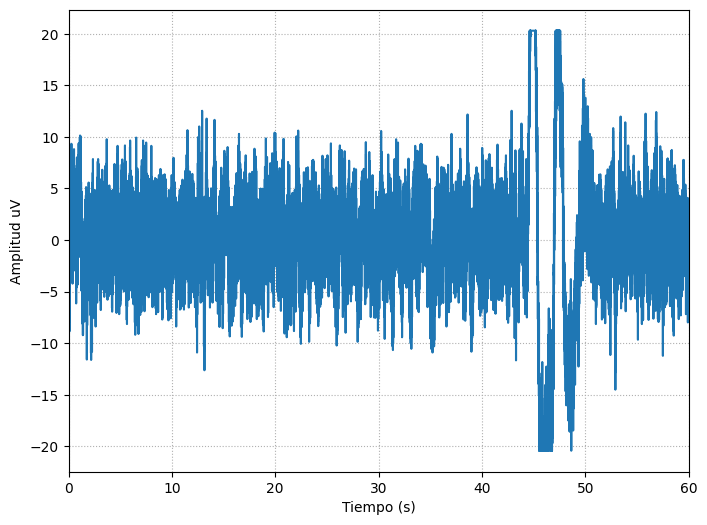

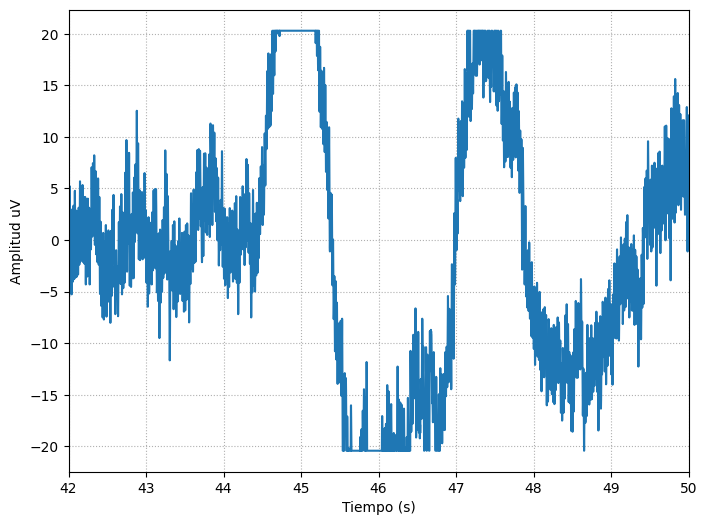

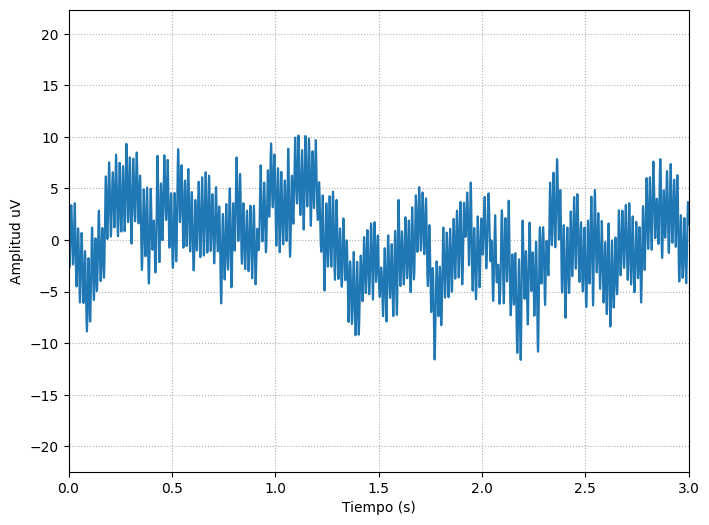

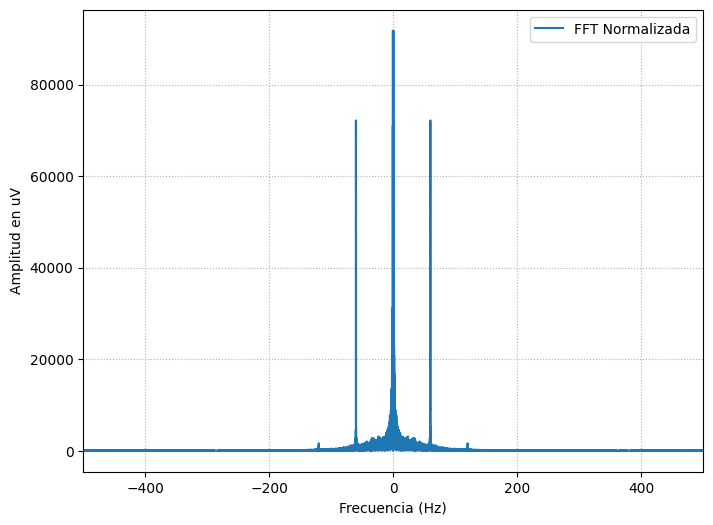

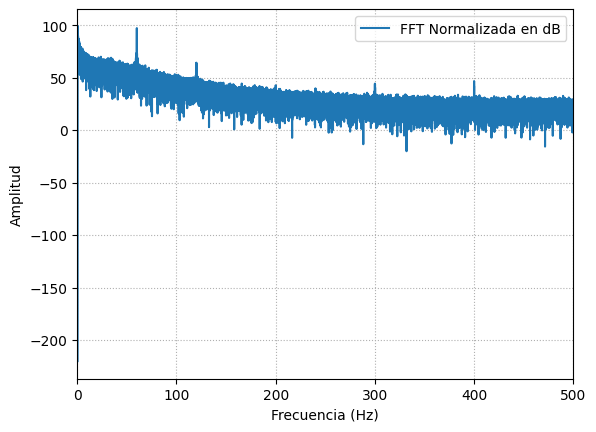

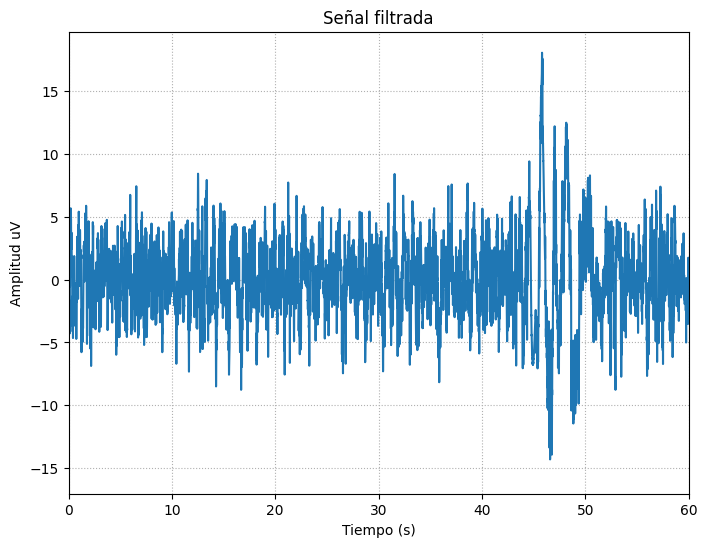

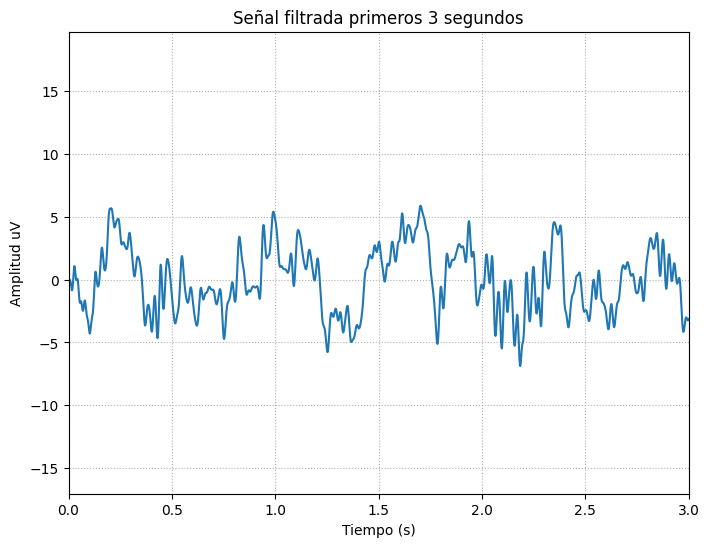

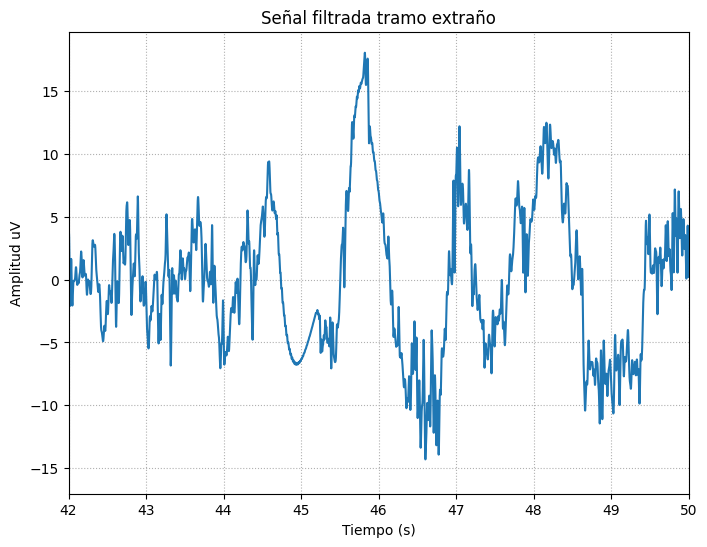

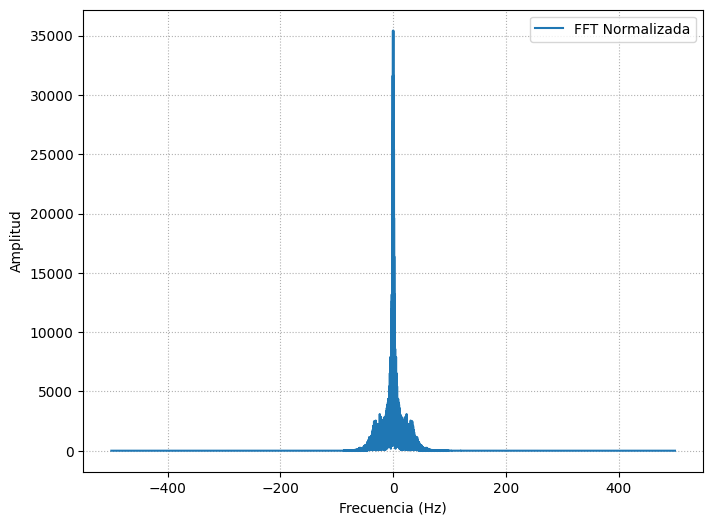

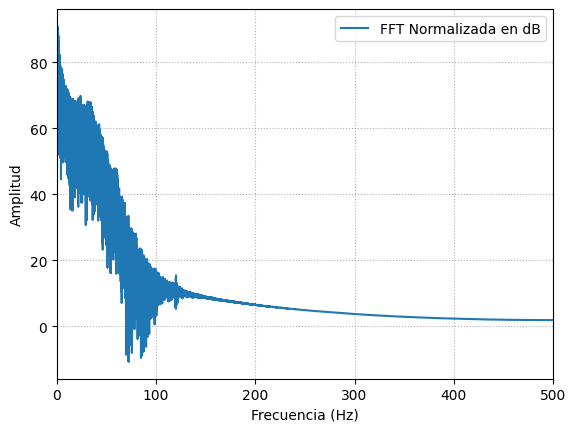

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal
from scipy.signal import medfilt, iirnotch, butter, filtfilt

f = open("eegreposo.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

raw_data
Fs = 1000
Ts = 1/Fs
print(f" Fs={Fs} hz\n Ts={Ts} s")

a = np.genfromtxt("./eegreposo.txt", delimiter="\t",skip_header = 3)
yarray = a[:, 5]
N=len(yarray)
yarray = yarray - np.mean(yarray)
yarray = np.array(yarray) * 40000/1000000
xarray = np.arange(1, len(yarray)+1)/Fs
xarray=xarray
plt.figure(figsize=(8, 6))
plt.plot(xarray, yarray, label="señal")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud uV")
plt.grid(linestyle=":")
plt.xlim(0,60)

plt.figure(figsize=(8, 6))
plt.plot(xarray, yarray, label="señal")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud uV")
plt.xlim(42,50)

plt.figure(figsize=(8, 6))
plt.plot(xarray, yarray, label="señal primeros 3 segundos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud uV")
plt.grid(linestyle=":")
plt.xlim(0,3)
#FFT
signal_fft = np.fft.fft(yarray)
frequencies = np.fft.fftfreq(N, Ts)
frequencies = np.fft.fftshift(frequencies)
signal_fft = np.fft.fftshift(signal_fft)
plt.figure(figsize=(8, 6))
plt.plot(frequencies, np.abs(signal_fft), label="FFT Normalizada")
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud en uV")
plt.legend(loc="upper right")
plt.xlim(-Fs/2, Fs/2)

plt.figure()
plt.plot(frequencies, 20*np.log10(np.abs(signal_fft)), label="FFT Normalizada en dB")
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.xlim(0, Fs/2)

f_high = 0.5
f_low = 40

# Crear el filtro

nyquist = 0.5 * Fs
low = f_low / nyquist
high = f_high / nyquist
b, a = signal.butter(5, low, btype='low', analog=False)
filtered_signal = signal.lfilter(b, a, yarray)
#Filtro pasa alta

b, a = signal.butter(5, high, btype='high', analog=False)
filtered_signal = signal.lfilter(b, a, filtered_signal)
b, a = signal.iirnotch(60, 30, Fs)
filtered_signal = signal.lfilter(b, a, filtered_signal)

plt.figure(figsize=(8, 6))
plt.plot(xarray, filtered_signal)
plt.title("Señal filtrada")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud uV")
plt.xlim(0,60)

plt.figure(figsize=(8, 6))
plt.plot(xarray, filtered_signal)
plt.title("Señal filtrada primeros 3 segundos")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud uV")
plt.xlim(0,3)

plt.figure(figsize=(8, 6))
plt.plot(xarray, filtered_signal)
plt.title("Señal filtrada tramo extraño")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud uV")
plt.xlim(42,50)

signal_fft2 = np.fft.fft(filtered_signal)
frequencies = np.fft.fftfreq(N, Ts)
frequencies = np.fft.fftshift(frequencies)
signal_fft2 = np.fft.fftshift(signal_fft2)
plt.figure(figsize=(8, 6))
plt.plot(frequencies, np.abs(signal_fft2), label="FFT Normalizada")
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")

plt.figure()
plt.plot(frequencies, 20*np.log10(np.abs(signal_fft2)), label="FFT Normalizada en dB")
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.xlim(0, Fs/2)